# Kmeans決定集群數目方法
1. elbow(轉折判斷法) 
2. Silhouette(輪廓圖分析)

本篇針對這兩種方法進行說明

## 方法一、轉折判斷法、Elbow
設定各種集群數目，執行Kmeans，計算集群內的"誤差平方和"(SSE)

我們可針對一個已分群的資料集，進行Kmeans訓練，並取得誤差平方和，由於不知道分成幾群比較好，所以執行迴圈進行2~10次分群並繪圖，來取得最佳分群數。

### 步驟一、建立隨機資料集

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# 建立隨機資料
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,   # 150個樣本
                  n_features=2,    # 2個特徵
                  centers=3,       # 分3群
                  cluster_std=0.5, #標準差0.5
                  shuffle=True,    #打亂樣本
                  random_state=0)

In [3]:
X.shape, y.shape

((150, 2), (150,))

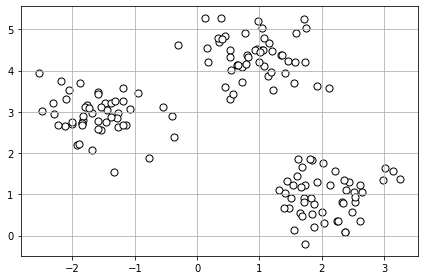

In [4]:
# 繪製資料散佈圖
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [5]:
#查看前5筆
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

### 步驟二、利用kmeans進行訓練

In [6]:
# 訓練模型
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)


In [7]:
# 取得預測值
y_km = km.fit_predict(X)                  

In [8]:
# 顯示 Distortion, 群組內的SSE
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


### 步驟三、轉折判斷法

In [9]:
# Using the elbow method to find the optimal number of clusters
distortions = [] #儲存誤差平方和的陣列

# 進行迴圈
for i in range(1, 11):  #含開始不含結束
    km = KMeans(n_clusters=i, #分i群(1~10群)
                init='k-means++', #決定起始點
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) #儲存誤差平方和


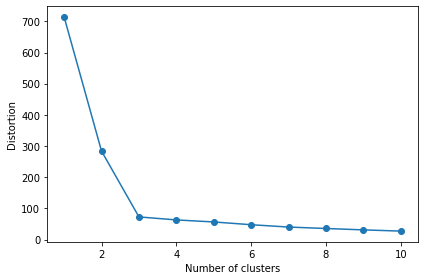

In [10]:
# 畫圖     
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()


結論: 取3群，效益佳

## 方法二、輪廓圖分析、Silhouette
[參考影片](https://www.youtube.com/watch?v=5TPldC_dC0s) 

[官方文件](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

輪廓圖分析(Silhouette Analysis):其目標是決定即群數目，計算輪廓係數，可檢驗樣本在集群中是否緊密在一起。  
1. 對樣本點$x^{(i)}$，計算其"集群內聚性"$a^{(i)}$，即$a^{(i)}$對其他樣本之間之平均距離，$a^{(i)}$越小越好  
2. 對樣本點$x^{(i)}$，計算其最相近即群的"集群分離性"$b^{(i)}$，即$b^{(i)}$對最相近即群中所有樣本之間之平均距離，$b^{(i)}$越大越好  
3. 計算輪廓silhouette分數，$s{(i)}$，其值越大越好，公式如下  
$s^{(i)}=\frac{b^{(i)}-a^{(i)}}{max{(b^{(i)}，a^{(i)})}}$

### 步驟一: 進行KMeans演算法，可使用分2群

In [11]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [12]:
# 執行KMeans演算法
km = KMeans(n_clusters=2,     #分成2群
            init='k-means++', 
            n_init=10,        
            max_iter=300,     
            tol=1e-04,        
            random_state=0)   
ykm_sil = km.fit_predict(X)

### 步驟二: 取得每個點silhouette分數

In [13]:
cluster_labels = np.unique(ykm_sil)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, ykm_sil, metric='euclidean') #參數為特徵、預測、距離算法(歐幾里得)
silhouette_vals #取得每個點silhouette分數

array([ 0.7882953 ,  0.38923407,  0.52211982,  0.55501878,  0.78197122,
        0.39231318,  0.36539069,  0.77034967,  0.52076799,  0.37139396,
        0.68367198,  0.32525645,  0.54324939,  0.51018379,  0.57910842,
        0.53478717,  0.59821967,  0.82440576,  0.55458851,  0.80019991,
        0.52561077,  0.79221766,  0.39470861,  0.48367391,  0.52113582,
        0.82876127,  0.78946442,  0.27934914,  0.54282261,  0.77181097,
        0.60458888,  0.55403934,  0.52145436,  0.58807535,  0.56683775,
        0.69138748,  0.72930406,  0.78659885,  0.52301938,  0.47328006,
        0.25152598,  0.42241728,  0.56433071,  0.78051492,  0.81226172,
        0.80916275,  0.59666707, -0.00119255,  0.52693014,  0.37746722,
        0.6691821 ,  0.55603136,  0.48540481,  0.81115468,  0.81632036,
        0.58519579,  0.44924776,  0.68651592,  0.60858223,  0.42074434,
        0.55118637,  0.53010646,  0.57655269,  0.59118001,  0.4505824 ,
        0.46840856,  0.49088486,  0.62495534,  0.59049654,  0.54

### 步驟三: 繪圖並取得整體分數

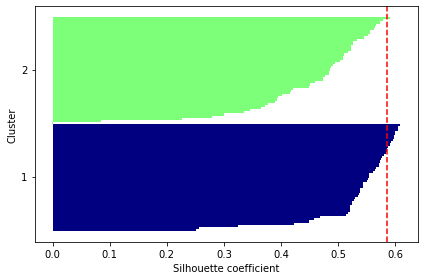

In [14]:
# 繪圖
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
# 畫輪廓值(silhouette)平均數的垂直線
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('silhouette.png', dpi=300)
plt.show()

輪廓圖解說:

<img src="https://github.com/Yi-Huei/bin/blob/master/images/silhouette_solution.png?raw=true" width="500px" />

由圖可知該數據分成兩群是不佳的，可考慮將藍色群體再分成兩群

In [15]:
# 整體分數
from sklearn.metrics import silhouette_score
silhouette_score(X, y)

0.7143417887288687

我們往往當下無法知道應該分成幾群，可以使用迴圈，由兩群開始分，到十群，再看整體分數

In [16]:
for i in range(2, 11): #含起始不含結束
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    y_km = km.fit_predict(X)  
    #print(y_km)
    #distortions.append(silhouette_score(X, y_km))
    print(f'{i}, silhouette_score: %.2f' % silhouette_score(X, y_km))

2, silhouette_score: 0.58
3, silhouette_score: 0.71
4, silhouette_score: 0.58
5, silhouette_score: 0.45
6, silhouette_score: 0.30


7, silhouette_score: 0.33
8, silhouette_score: 0.33
9, silhouette_score: 0.34


10, silhouette_score: 0.35


結論:
分成3群分數最高，所以分三群最好。

### 步驟四: 分成3群後，繪圖看看。

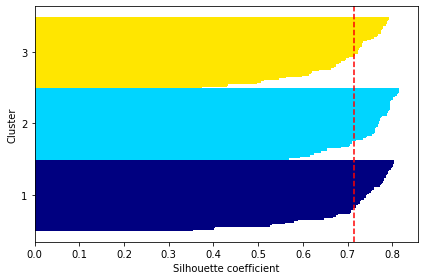

In [17]:
km = KMeans(n_clusters=3,     
            init='k-means++', 
            n_init=10,        
            max_iter=300,     
            tol=1e-04,        
            random_state=0)   
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #參數為特徵、預測、距離算法(歐幾里得)
silhouette_vals

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
# 畫輪廓值(silhouette)平均數的垂直線
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('silhouette.png', dpi=300)
plt.show()